## Loading Packages

In [16]:
#Standard data analytical libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import os, warnings, time, dmba
import scikitplot as skplt 
import warnings

#Data Mining Book Libraries
from dmba import liftChart, gainsChart,regressionSummary, classificationSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection, adjusted_r2_score, AIC_score, BIC_score
from os.path import exists
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, roc_auc_score, plot_confusion_matrix,confusion_matrix,r2_score
#Classification 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression,  LinearRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import imblearn
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

# Used to save keystrokes when wanting to print something. Now we can just use
# p("Hello") instead of print("Hello")
p = print
# import csv
# import re

# Change this value if you are not using o_desktop
computer = 'o_desktop'
#computer = 'other'
if (computer == 'o_desktop'):
    os.environ['NUMEXPR_MAX_THREADS'] = '24'
else:
    # default is 4 or 8
    os.environ['NUMEXPR_MAX_THREADS'] = '8'

# For future use:
# import threading
# import multiprocessing

## Loading Data

In [6]:
# Setting directories and loading training set and training labels
repo_directory = r'C:/ADS_599_Final/'
data_folder_directory = r'C:/ADS_599_Final/Data_Folder/'
df_features_file = 'C:/ADS_599_Final/Data_Folder/training_set_features.csv'
df_labels_file = 'C:/ADS_599_Final/Data_Folder/training_set_labels.csv'
df = pd.read_csv(df_features_file)
df_labels = pd.read_csv(df_labels_file)

# Combining training data with training labels for modeling
df = df.join(df_labels.set_index('respondent_id'), on='respondent_id')

df.head(5)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Exploring value counts

Show unique values per column in preparation of data cleaning and transformation. Only needs to be done once since the files saved in the repo.


In [3]:
uniq_values_file = 'unique_values_in_column.txt'
uniq_counts_file = 'unique_counts_in_column.txt'
if not exists(data_folder_directory + uniq_values_file):
    for col in df:
        # Unique values in each column
        with open(uniq_values_file, 'a') as f:
            f.write(str(df[col].unique()))
            f.write('\n')
        p(df[col].unique())

if not exists(data_folder_directory + uniq_counts_file):
    for col in df:
        # Occurence of each unique row value
        # Must set dropna=False
        with open(uniq_counts_file, 'a') as f:
            f.write(str(df[col].value_counts(dropna=False)))
            f.write('\n')
        p(df[col].value_counts())


[    0     1     2 ... 26704 26705 26706]
[ 1.  3.  2.  0. nan]
[ 0.  2.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 0. nan  1.]
[ 0. nan  1.]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 1. nan  0.]
[ 3.  5.  4.  2.  1. nan]
[ 1.  4.  3.  2.  5. nan]
[ 2.  4.  1.  5.  3. nan]
[ 2.  4.  5.  3.  1. nan]
[ 1.  2.  4.  3.  5. nan]
[ 2.  4.  1.  5. nan  3.]
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
['Not Married' 'Married' nan]
['Own' 'Rent' nan]
['Not in Labor Force' 'Employed' 'Unemployed' nan]
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
[ 0.  2.  1.  3. nan]
[ 0.  3.  2.

Exploring the number of null values per column and shape of the dataframe.

In [4]:
p("The null counts per column are: ")
p(df.isnull().sum())
p("Health insurance, employment_industry, and employment_occupation stand out as they are missing nearly 50%.")

p("\nThe shape of the dataframe is: ")
p(df.shape)

The null counts per column are: 
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
incom

## Exploratory Data Analysis

In order to better understand the variables, both numeric and categorical, the plots below were produced. Bars for the frequency of a category or numeric range are shown, along with a density curve. 

In [12]:
# Using encoding to remove null values

encoding_selection = "label" # options "label" "onehot"
if encoding_selection == "label":
    df_train = df_train
    # Encode labels the below is equivalent to df_train['hhs_geo_region']= label_encoder.fit_transform(df_train['hhs_geo_region'])
    df_train["hhs_geo_region"] = df_train["hhs_geo_region"].astype('category')
    df_train["hhs_geo_region"] = df_train["hhs_geo_region"].cat.codes
    df_train["census_msa"] = df_train["census_msa"].astype('category')
    df_train["census_msa"] = df_train["census_msa"].cat.codes
    df_train["employment_industry"] = df_train["employment_industry"].astype('category')
    df_train["employment_industry"] = df_train["employment_industry"].cat.codes
    df_train["employment_occupation"] = df_train["employment_occupation"].astype('category')
    df_train["employment_occupation"] = df_train["employment_occupation"].cat.codes
    df_train["employment_status"] = df_train["employment_status"].astype('category')
    df_train["employment_status"] = df_train["employment_status"].cat.codes
    df_train["rent_or_own"] = df_train["rent_or_own"].astype('category')
    df_train["rent_or_own"] = df_train["rent_or_own"].cat.codes
    df_train["marital_status"] = df_train["marital_status"].astype('category')
    df_train["marital_status"] = df_train["marital_status"].cat.codes
    df_train["income_poverty"] = df_train["income_poverty"].astype('category')
    df_train["income_poverty"] = df_train["income_poverty"].cat.codes
    df_train["race"] = df_train["race"].astype('category')
    df_train["race"] = df_train["race"].cat.codes
    df_train["education"] = df_train["education"].astype('category')
    df_train["education"] = df_train["education"].cat.codes
    df_train["age_group"] = df_train["age_group"].astype('category')
    df_train["age_group"] = df_train["age_group"].cat.codes
    df_train["sex"] = df_train["sex"].astype('category')
    df_train["sex"] = df_train["sex"].cat.codes
elif encoding_selection == "onehot":
    # Right now are are using label encoding. 
    # TODO We could try other encoding methods and see if the results improve
    p("We can try one hot encoder here.")

p("After encoding the null counts per column are: ")
p(df_train.isnull().sum())

After encoding the null counts per column are: 
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status           

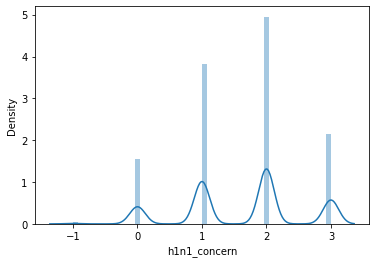

<Figure size 432x288 with 0 Axes>

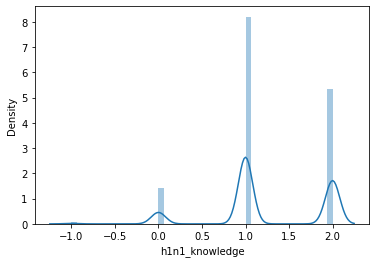

<Figure size 432x288 with 0 Axes>

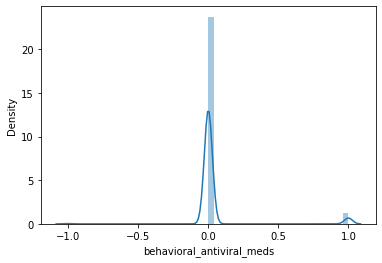

<Figure size 432x288 with 0 Axes>

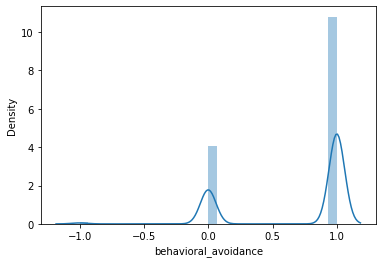

<Figure size 432x288 with 0 Axes>

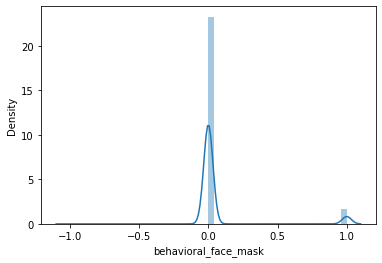

<Figure size 432x288 with 0 Axes>

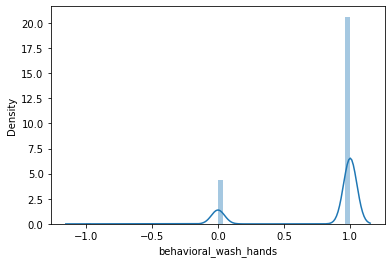

<Figure size 432x288 with 0 Axes>

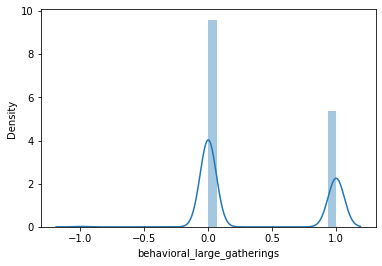

<Figure size 432x288 with 0 Axes>

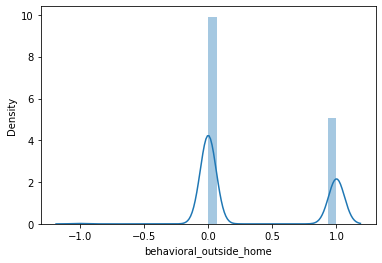

<Figure size 432x288 with 0 Axes>

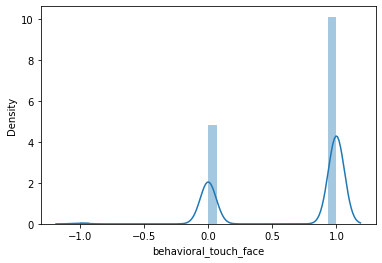

<Figure size 432x288 with 0 Axes>

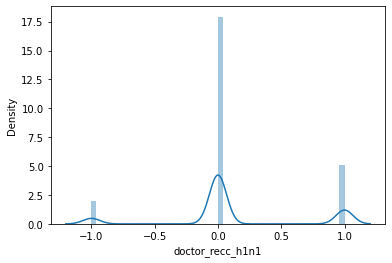

<Figure size 432x288 with 0 Axes>

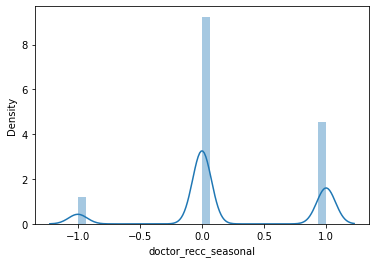

<Figure size 432x288 with 0 Axes>

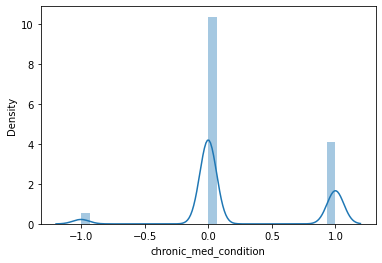

<Figure size 432x288 with 0 Axes>

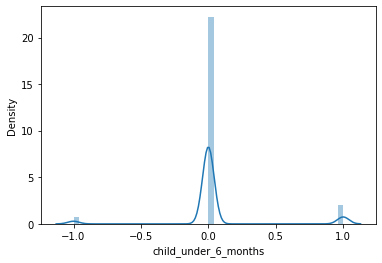

<Figure size 432x288 with 0 Axes>

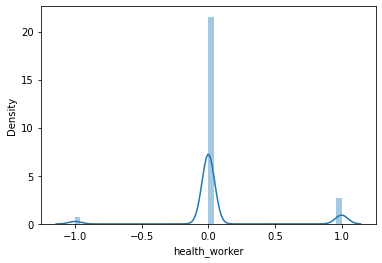

<Figure size 432x288 with 0 Axes>

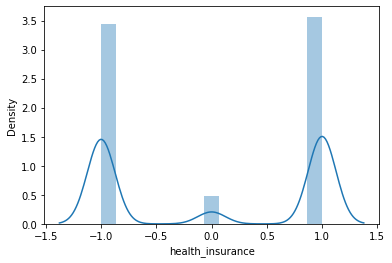

<Figure size 432x288 with 0 Axes>

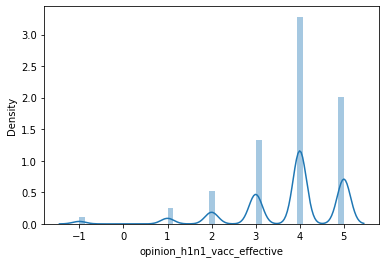

<Figure size 432x288 with 0 Axes>

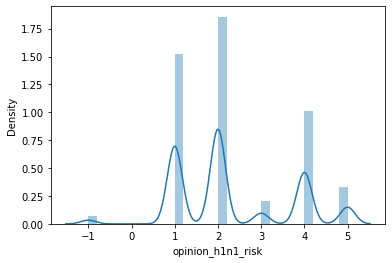

<Figure size 432x288 with 0 Axes>

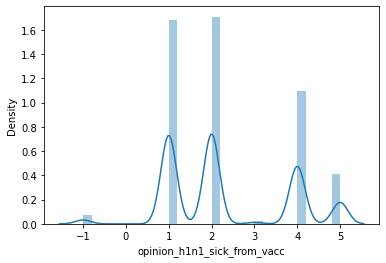

<Figure size 432x288 with 0 Axes>

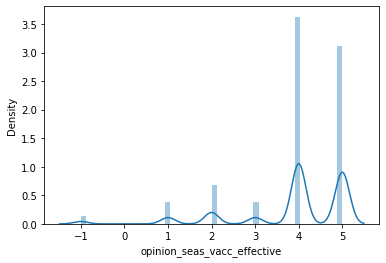

<Figure size 432x288 with 0 Axes>

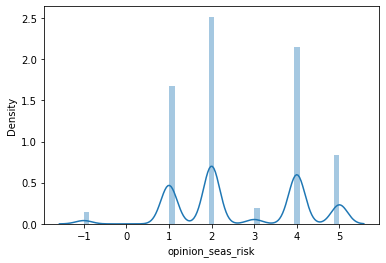

<Figure size 432x288 with 0 Axes>

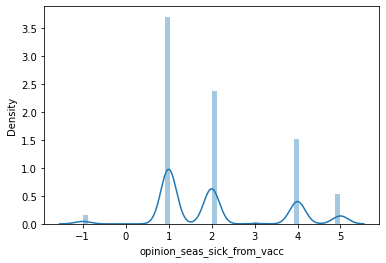

<Figure size 432x288 with 0 Axes>

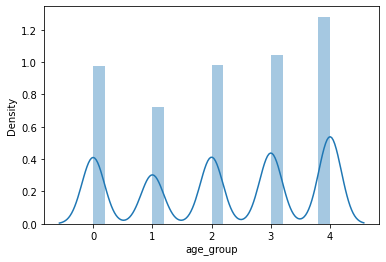

<Figure size 432x288 with 0 Axes>

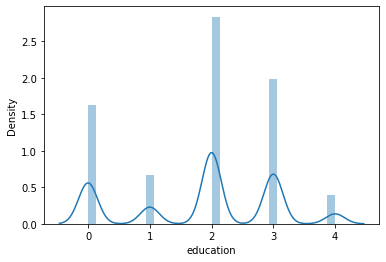

<Figure size 432x288 with 0 Axes>

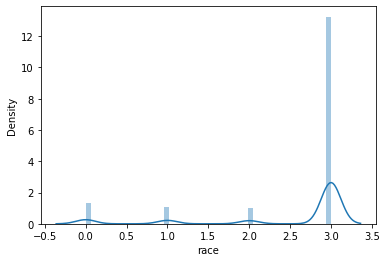

<Figure size 432x288 with 0 Axes>

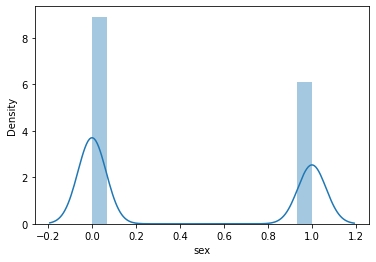

<Figure size 432x288 with 0 Axes>

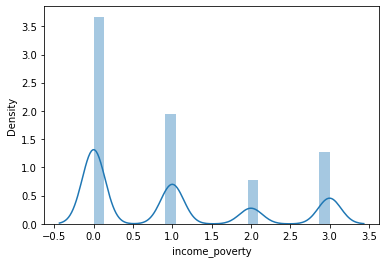

<Figure size 432x288 with 0 Axes>

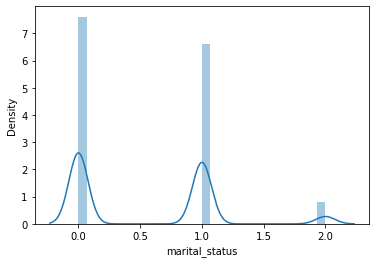

<Figure size 432x288 with 0 Axes>

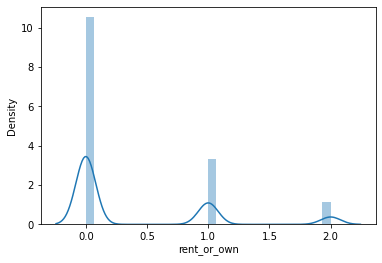

<Figure size 432x288 with 0 Axes>

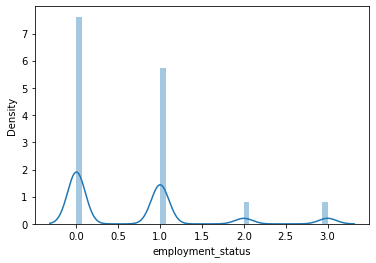

<Figure size 432x288 with 0 Axes>

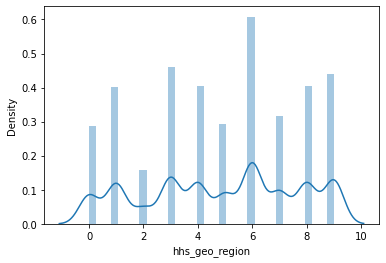

<Figure size 432x288 with 0 Axes>

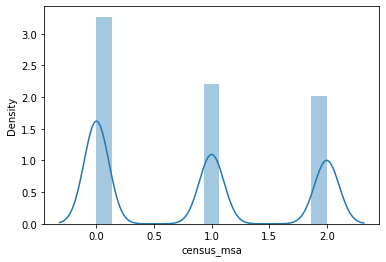

<Figure size 432x288 with 0 Axes>

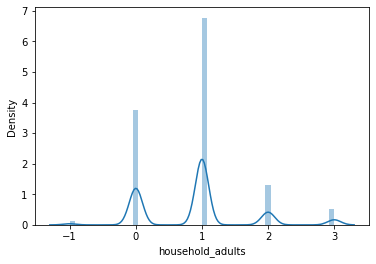

<Figure size 432x288 with 0 Axes>

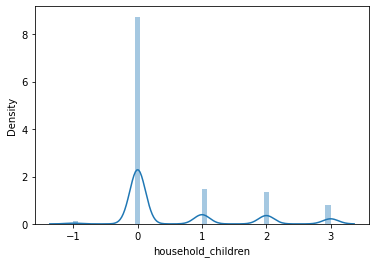

<Figure size 432x288 with 0 Axes>

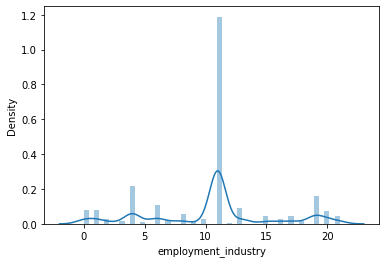

<Figure size 432x288 with 0 Axes>

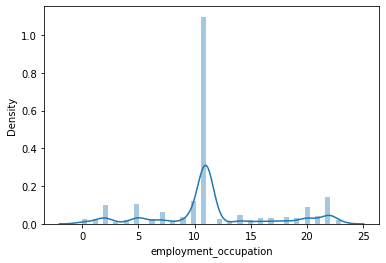

<Figure size 432x288 with 0 Axes>

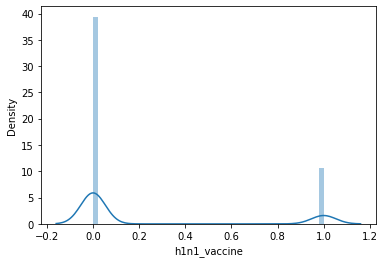

<Figure size 432x288 with 0 Axes>

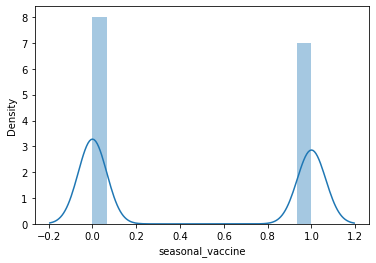

<Figure size 432x288 with 0 Axes>

In [17]:
# create distplots
for column in df_train.columns:
    plt.figure()            
    sns.distplot(df_train[column])
    plt.figure()

### Examining correlation between variables

Correlation heatmap:

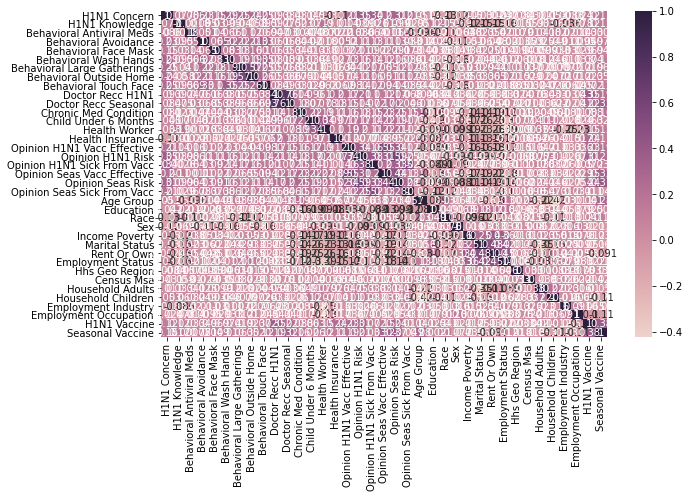

In [13]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_train.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_train.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Correlation table:

In [14]:
df_train.corr()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.076568,0.085562,0.230465,0.151493,0.289809,0.250078,0.240748,0.246532,0.092702,...,-0.002388,0.036798,-0.008409,0.003074,-0.011020,0.053092,-0.008264,-0.023937,0.120970,0.152583
h1n1_knowledge,0.076568,1.000000,-0.001816,0.095192,0.029994,0.094993,-0.039979,-0.057778,0.094727,0.092033,...,-0.150621,-0.160954,-0.015268,-0.059151,0.033406,0.060474,-0.085806,-0.078106,0.115295,0.116014
behavioral_antiviral_meds,0.085562,-0.001816,1.000000,0.051383,0.139040,0.065579,0.102030,0.121166,0.069112,0.047340,...,0.054453,0.020685,0.007902,0.010412,0.040948,0.081529,0.019574,0.013989,0.033279,0.000779
behavioral_avoidance,0.230465,0.095192,0.051383,1.000000,0.065182,0.319223,0.221717,0.213970,0.326056,0.061208,...,-0.048042,-0.019537,0.000348,-0.028952,0.025248,0.049375,-0.010883,-0.009453,0.048754,0.071148
behavioral_face_mask,0.151493,0.029994,0.139040,0.065182,1.000000,0.082940,0.175517,0.159806,0.104119,0.063318,...,0.051427,0.040285,0.009380,-0.003500,0.009870,0.003306,-0.030043,-0.028929,0.069268,0.049073
behavioral_wash_hands,0.289809,0.094993,0.065579,0.319223,0.082940,1.000000,0.189771,0.189296,0.350856,0.080813,...,-0.026052,-0.012318,-0.006257,-0.017941,0.011999,0.046350,-0.011029,-0.033039,0.074172,0.110889
behavioral_large_gatherings,0.250078,-0.039979,0.102030,0.221717,0.175517,0.189771,1.000000,0.568979,0.247078,0.057276,...,0.044068,0.102864,0.011214,0.036961,-0.028807,-0.007906,0.007214,0.011999,0.018719,0.062577
behavioral_outside_home,0.240748,-0.057778,0.121166,0.213970,0.159806,0.189296,0.568979,1.000000,0.261638,0.053033,...,0.064544,0.118961,0.014637,0.028628,-0.023710,-0.007198,0.016568,0.011824,0.022869,0.052399
behavioral_touch_face,0.246532,0.094727,0.069112,0.326056,0.104119,0.350856,0.247078,0.261638,1.000000,0.084245,...,-0.021028,0.008818,-0.005138,0.003222,0.004742,0.025994,-0.006232,-0.044981,0.072347,0.115772
doctor_recc_h1n1,0.092702,0.092033,0.047340,0.061208,0.063318,0.080813,0.057276,0.053033,0.084245,1.000000,...,-0.037702,-0.033312,-0.023561,-0.007562,0.034349,0.033375,-0.029806,-0.043021,0.353960,0.189412


If someone has one vaccine, it is correlated with them having the other. Many of the variables correlated to one vaccine are similarly correlated to the other, with the exception of household_children which is correlated to the flu vaccine, but not H1N1.

### Exploring variance

In [11]:
df_train.var()

<ipython-input-11-f2c46f1a9be4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.var()


h1n1_concern                   0.849349
h1n1_knowledge                 0.402587
behavioral_antiviral_meds      0.049253
behavioral_avoidance           0.220567
behavioral_face_mask           0.064993
behavioral_wash_hands          0.148988
behavioral_large_gatherings    0.235270
behavioral_outside_home        0.228330
behavioral_touch_face          0.230957
doctor_recc_h1n1               0.268591
doctor_recc_seasonal           0.334589
chronic_med_condition          0.253347
child_under_6_months           0.108326
health_worker                  0.132504
health_insurance               0.934782
opinion_h1n1_vacc_effective    1.339503
opinion_h1n1_risk              1.788567
opinion_h1n1_sick_from_vacc    1.993946
opinion_seas_vacc_effective    1.589634
opinion_seas_risk              2.142554
opinion_seas_sick_from_vacc    1.932599
household_adults               0.595224
household_children             0.875225
h1n1_vaccine                   0.167323
seasonal_vaccine               0.248827
